# Homework 02 - 19 September, 2024


# 1. Monty Hall Problem - Python Simulation

Given a program simulating the Monty Hall scenario provided by Professor Schwartz, we ask ChatGPT to explain the code in its statistical and programming context in order to fully understand the problem and be able to analyze its results.

In [13]:
# Code from Prof. Schwartz

import numpy as np
all_door_options = (1,2,3)  # tuple
my_door_choice = 1  # 1,2,3
i_won = 0
reps = 100000
for i in range(reps):
    secret_winning_door = np.random.choice(all_door_options)
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66576

## Chat-GPT's Response:

This code simulates the Monty Hall problem over 100,000 iterations to illustrate the probability of winning when always using the strategy of switching doors after a goat is revealed.

1. **Initialization:**
   - `all_door_options = (1, 2, 3)` defines the three doors in the game.
   - The player always starts by choosing door 1 (`my_door_choice = 1`).
   - `i_won = 0` keeps track of how many times the player wins, while `reps = 100,000` defines the number of trials.

2. **Simulating a Single Game (Looped 100,000 Times):**
   - A random winning door (`secret_winning_door = np.random.choice(all_door_options)`) is selected, representing where the car is hidden.
   - A copy of the door list is created (`all_door_options_list = list(all_door_options)`) to allow for manipulation.
   
3. **Goat Door Removal:**
   - The code removes the `secret_winning_door` from the list to ensure it won’t be selected as a goat door.
   - It then tries to remove `my_door_choice` (the player's original choice of door 1). If door 1 was already the winning door, this removal is skipped using a `try-except` block.
   
4. **Revealing a Goat Door:**
   - From the remaining doors (excluding the player’s choice and the winning door), the code randomly selects one as the "goat door" to reveal (`goat_door_reveal = np.random.choice(all_door_options_list)`).
   - This simulates Monty Hall opening a door to show a goat. The goat door is then removed from the list.

5. **Switching Strategy:**
   - After the goat door is revealed, the player is left with one remaining unopened door. If the player’s original choice was not the winning door, the code adds the winning door back to the list (`all_door_options_list.append(secret_winning_door)`).
   - The player then switches to the only remaining door (`my_door_choice = all_door_options_list[0]`), simulating the switching strategy.

6. **Win Check:**
   - After switching, the code checks if the player's new choice matches the winning door (`if my_door_choice == secret_winning_door`).
   - If the player has won (i.e., chosen the door with the car), the win counter (`i_won`) is incremented.

7. **Final Calculation:**
   - Once the simulation runs through all 100,000 repetitions, the proportion of games won by switching is calculated (`i_won/reps`).
   - This ratio approximates the probability of winning when following the switching strategy, which should be close to 2/3. This result reflects the theoretical outcome of the Monty Hall problem: switching doors significantly increases the player’s chances of winning compared to sticking with the original choice (which only wins 1/3 of the time).

This simulation demonstrates the counterintuitive result that switching doors is the optimal strategy, and provides empirical evidence of the advantage through repeated trials.

# 2. Simplified For Loop

When prompted to streamline the original code provided, Chat-GPT preferred to use a list comprehension ( `[x for x in collection]` ). It utilized boolean comparisons within each comprehension in order to filter the elements of each list to the constrained conditions. <br><br>

This decreases the amount if if statements and overall makes the code a lot cleaner. List comprehensions are a fairly beginner-friendly concept and an easy way to condense code into one readable line.

Take the example of choosing a goat door:
- Instead of looping over all doors and finding which one is neither the chosen door or the winning door, we make a list of all doors that satisfy these conditions and let numpy pick a random one from such a collection.

In [6]:
# import numpy for random operations and define variables

import numpy as np
all_door_options = (1, 2, 3)
my_door_choice = 1
i_won = 0
reps = 100000

for i in range(reps):
    
    # Use np to randomly choose a door to be the winner
    secret_winning_door = np.random.choice(all_door_options)
    
    ### Monty reveals a goat door that's neither the player's choice nor the winning door

    # Possible goat doors will not be the winning door, nor will it be the chosen door
    remaining_doors = [door for door in all_door_options if door != my_door_choice and door != secret_winning_door]
    
    # Choose a random goat door from the options defined above
    goat_door_reveal = np.random.choice(remaining_doors)
    
    # Other available door that is unopened (Not the chosen door AND not the goat door)
    other_available_doors = [door for door in all_door_options if door != my_door_choice and door != goat_door_reveal]
    
    # Switch to the other unopened door
    switched_choice = other_available_doors[0]
    
    # Check if switching wins
    if switched_choice == secret_winning_door:
        i_won += 1

# Calculate win rate (win rate = total wins / total attempts)
i_won / reps

0.66645

___

# 3. Commented Final Code

I had commented most of the code in Q2., but asked Chat-GPT to refine my comments for greater clarity by adding comments and cleaning up existing comments. The result is shown below.

NOTE: While these are GPT's comments, they are mostly based off my original comments in Q2. (showing that I understand the code's steps and purpose).

In [7]:
# Import the numpy library to use random functions and define key variables
import numpy as np

# Define the available doors (1, 2, 3) as a tuple
all_door_options = (1, 2, 3)

# The player always initially chooses door 1
my_door_choice = 1

# Initialize a counter to track the number of wins when switching
i_won = 0

# Define the number of repetitions (100,000 simulations)
reps = 100000

# Loop over the number of repetitions (simulate 100,000 rounds of the game)
for i in range(reps):
    
    # Randomly select one door as the winning door (the door hiding the car)
    secret_winning_door = np.random.choice(all_door_options)
    
    # Determine the doors Monty can reveal (neither the player's choice nor the winning door)
    remaining_doors = [
        door for door in all_door_options 
        if door != my_door_choice and door != secret_winning_door
    ]
    
    # Monty randomly reveals one of the remaining goat doors
    goat_door_reveal = np.random.choice(remaining_doors)
    
    # Determine the other unopened door (the door the player will switch to)
    other_available_doors = [
        door for door in all_door_options 
        if door != my_door_choice and door != goat_door_reveal
    ]
    
    # Switch the player's choice to the remaining unopened door
    switched_choice = other_available_doors[0]
    
    # Check if the switched choice is the winning door (if the player wins after switching)
    if switched_choice == secret_winning_door:
        # Increment the win counter if the player wins by switching
        i_won += 1

# Calculate the win rate by dividing the number of wins by the total number of repetitions
i_won / reps

0.66679

___

# 4. Markvoain Chat Bots

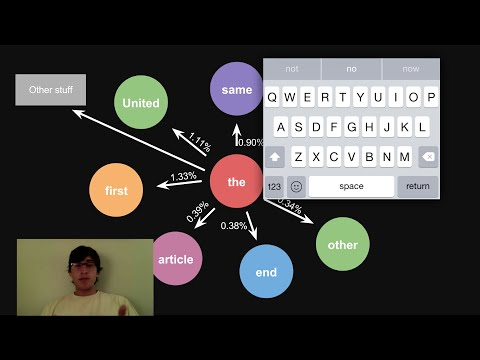

In [1]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

In [3]:
# Markovian Chatbot
# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1

NameError: name 'words' is not defined

### Detailed Code Description:

The provided code is a simple implementation of a **Markovian chatbot** that learns word transitions from a sequence of words. Here's a more detailed explanation of the code and its components:

#### Key Variables:
1. **`word_used`**: 
   - This is a dictionary where each word in the training data is a key, and the value is the count of how many times that word appears. However, as discussed later, this isn't strictly necessary for the chatbot’s functionality.
   
2. **`next_word`**: 
   - This is the key data structure for a Markovian model. It is a **nested dictionary** where:
     - The first dictionary has each word as a key.
     - The value for each word is another dictionary that tracks how many times each subsequent word follows it.

#### Code Breakdown:
- The loop `for i, word in enumerate(words[:-1])` iterates through the list of words (`words`) but stops one word before the last word, ensuring there is always a `next_word` to check. Each word serves as the current word (`word`), and the code checks what word follows it (`words[i+1]`).

- **Word Counting (`word_used`)**:
   - For each word, the code checks if it already exists in the `word_used` dictionary.
     - If it does, the count is incremented.
     - If not, the word is added to `word_used` with an initial count of 1. It also creates an entry for that word in `next_word`.

- **Next Word Counting (`next_word`)**:
   - For each word, the code tracks the word that comes immediately after it (`words[i+1]`).
   - The code checks if the next word is already in the nested dictionary for the current word in `next_word`.
     - If it is, its count is incremented.
     - If not, the next word is added with an initial count of 1.
   
#### How This Relates to Markov Models:
This code builds a **first-order Markov chain** by recording the transitions between words in the `next_word` dictionary. In a Markov chain:
- Each word is considered a "state."
- The transitions between states (words) are determined by how often one word follows another, as recorded in `next_word`.

When the chatbot generates a response, it can look at the current word, consult the `next_word` dictionary, and probabilistically choose the next word based on observed transitions.

---

### Rest of the Summary:

#### Focus on Transition Frequencies:
- In a Markovian model, **the critical information** is how many times a word follows another, rather than how many times the word appears in isolation.
- The **`next_word` dictionary** provides this, storing the frequency of transitions between words, which is crucial for generating sentences.

#### Clarification on Word Frequencies (`word_used`):
- While **word frequencies** (from `word_used`) are useful for some models, they are **not essential** to the chatbot's core functionality of generating word sequences.
- The focus is on **transition probabilities**—how frequently one word follows another—which allows the chatbot to maintain a coherent flow in conversation.

In conclusion, this discussion highlighted the essentials of a Markovian chatbot, emphasizing that transitions between words, as captured by the `next_word` dictionary, are key to predicting the next word and generating text.

___

# 5. Markovian ChatBot Extensions

In [1]:
# Markovian Chatbot Extension #1

word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1 

NameError: name 'defaultdict' is not defined

In [2]:
# Markovian Chatbot Extension #2

from collections import Counter, defaultdict
# `avatar` is a dataset, and `character` is one of it's columns
characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
# this code changes the type of the `character` column to `str`; then,
# makes the text uppercase, and replaces spaces with '.'

nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1

NameError: name 'avatar' is not defined

## 1. GPT Understanding of Code Extensions

When given extensions of the Markovian model of text generation, GPT gives the following response when prompted to provide an explanation: 

### What's Happening in Extension #1:

1. **Bigrams instead of Unigrams**:
   - Instead of using individual words (`unigrams`) to track word transitions, this extension uses **bigrams** (pairs of two consecutive words). This means that the current "state" in the Markov model is now a pair of words, not just one.
   
2. **Data Structures**:
   - `word_used2`: This `defaultdict(int)` counts how often a particular **pair of words** (bigram) appears in the dataset.
   - `next_word2`: This is a nested `defaultdict` that tracks how often a **third word** follows a specific bigram.
   
3. **Loop**:
   - The loop iterates through the list `words` but stops at the third-to-last word (`words[:-2]`), ensuring that there are always two following words to create a bigram and a third word for the next step.
   - For each iteration:
     - The pair of words (`word + ' ' + words[i+1]`) is treated as a **single entity** (bigram).
     - `word_used2[word + ' ' + words[i+1]]` tracks how many times this bigram appears.
     - `next_word2[word + ' ' + words[i+1]][words[i+2]]` records how many times the third word (`words[i+2]`) follows the bigram.

#### Purpose of Extension #1:

This extension moves from a **first-order** Markov model (where the next word depends only on the current word) to a **second-order** Markov model, where the next word depends on the **previous two words**. This approach can provide more contextual accuracy by considering a broader history when predicting the next word, allowing for more natural and coherent responses in text generation.

---

### What's Happening in Extension #2:

1. **Introduction of `character` Context**:
   - This extension adds a character-based context to the Markov chain model. The `characters` variable processes the `avatar.character` column, converting each character's name to uppercase and replacing spaces with periods.
   - The character name is treated as an identifier or marker in the chatbot’s dataset.

2. **Nested `defaultdict` for Multiple Characters**:
   - `nested_dict`: A function that returns a `defaultdict` of itself. This allows for deeply nested dictionaries, useful for organizing the data under multiple layers (e.g., characters → bigrams → next words).
   - `word_used2C` and `next_word2C` are **character-specific dictionaries** where data is organized by character names.

3. **Loop and Logic**:
   - The loop iterates through the list of words (similar to Extension #1), but with an additional layer of character context:
     - The first `if word in characters:` checks if the current word is a character's name. If so, the `character` variable is updated to that word, associating the bigram and next word with the current character.
     - **For each character**:
       - `word_used2C[character][word + ' ' + words[i+1]]` tracks how many times a bigram (pair of words) is used in that character's speech or dialogue.
       - `next_word2C[character][word + ' ' + words[i+1]][words[i+2]]` records how often the third word follows a bigram, but specifically **under the character’s name**.

#### Purpose of Extension #2:

This extension allows the chatbot to differentiate between word transitions based on **character context**. It is useful in cases where the chatbot interacts with multiple personas or characters, and their speech patterns may differ. By tracking bigrams and next words for each character, the model can generate text that is more **character-specific**, adapting the language based on who is speaking.

### Overall Goal:
Both extensions aim to add more complexity and context to the Markovian model:
- **Extension #1**: Moves from a first-order to a second-order Markov model by considering bigrams.
- **Extension #2**: Adds a character-specific dimension, allowing the model to differentiate speech patterns or word transitions for different characters.

Overall, GPT does an excellent job identifying the changes in the code and explaining them. It correctly pointed out that extension one looks two words ahead in making the dictionaries for each word used, essentially creating a pair of successive words for each word in a sequence. As GPT explained, this **bigram** model provides greater context and makes the generated text more sensible.

GPT not only correctly identified that extension two also uses a bigram model, but also explained how it introduced additional context by tracking the character's bigram sequencing. This allows for character-specific dialogue.

## 2. Code Details

While extension 1 was fairly straight forward, extension 2 was still confusing, so I prompted GPT with some questions, specifically how bigrams are stored under character-specific dictionaries. Below is a summary of the dialogue.

### Session Summary: Understanding Extension 2 of the Markovian Chatbot

In this session, we delved into **Extension 2** of the Markovian chatbot, which enhances the model by adding **character-specific bigram chains**. The goal of this extension is to track how words are used by each character independently, allowing the chatbot to generate personalized and contextually accurate dialogue for multiple personas.

#### Key Features of Extension 2:

1. **Character Identification**:
   - The model recognizes when a character's name appears in the text by referencing a dataset (`characters`). When it encounters a character name, it updates the context to reflect that character, indicating that subsequent words should be tracked as part of that character’s dialogue.

2. **Bigram Chains for Each Character**:
   - After identifying a character, the model begins forming **bigrams** (pairs of consecutive words) from their speech. The model records how often each bigram occurs in **`word_used2C`** and tracks what the next word is after each bigram in **`next_word2C`**.
   - This forms a **second-order Markov chain** for each character, allowing the chatbot to predict the third word based on the previous two words spoken by that specific character. The word transitions are stored separately for each character, meaning that the model maintains independent chains for every speaker.

3. **Tracking New Bigrams**:
   - As the text progresses, each new bigram (two consecutive words) generates a new entry for the character’s chain. The third word that follows the bigram is then tracked under that character’s data. This continues for all word sequences spoken by the character until another character is introduced.

4. **Switching Between Characters**:
   - When a new character’s name appears in the text, the context **resets** to that new character, and the process starts over. The model begins creating a new bigram chain for the new character, keeping the word transitions distinct between speakers. This ensures that each character’s speech patterns are captured independently, preserving their unique dialogue style.

#### Example Walkthrough:
We worked through an example using the text `"BOBBY: Hi, I like to play basketball. JOE: So do I."` to illustrate how the chatbot tracks character-specific bigrams.

- For **BOBBY**, the model identified bigrams like:
  - `"Hi I" → "like"`
  - `"I like" → "to"`
  - `"like to" → "play"`
  - `"to play" → "basketball"`

- When **JOE** started speaking, the model switched context and recorded a new bigram chain for him:
  - `"So do" → "I"`

This process shows how Extension 2 allows the chatbot to generate responses based on character-specific dialogue sequences, making the chatbot character-aware and capable of producing more natural and relevant responses based on the unique speech patterns of each individual character.

### Conclusion:
Extension 2 transforms the Markovian chatbot by creating distinct **bigram chains** for each character in the dataset. This extension improves the chatbot’s ability to generate more personalized and contextually relevant dialogue by ensuring that word transitions are tracked separately for each character. By switching contexts when a new character speaks, the model maintains separate chains, ensuring that each speaker's unique word patterns are accurately represented in future text generation.

## 3. GPT Experiment: Complex Extension Model

Getting Chat-GPT to accurately provide an explanation of Extension 2 was far more difficult than expected. It took approximately 15 minutes of back-and-forth dialogue, including hinting the ChatBot, for it to finally understand the purpose of the model. The session summary below, provided by the ChatBot, explains misconceptions, misunderstandings, and finally, realizations of the code's purpose:

### Summary of the Session

#### Initial Confusion

1. **Trigrams vs. Bigrams**:
   - **Misunderstanding**: Initially, there was confusion about whether the code was handling trigrams or bigrams. Trigrams involve a sequence of three words, while bigrams involve two-word sequences.
   - **Clarification**: It was established that the code was not handling trigrams but was focused on tracking bigrams and their subsequent words.

2. **Character Count and Filtering**:
   - **Misinterpretation**: There was an initial misinterpretation regarding the role of the `characters` Counter, which was thought to be for filtering or processing data.
   - **Clarification**: The correct role was identified as helping to manage and differentiate dialogue contexts for each character.

3. **Code Purpose and Structure**:
   - **Initial Misunderstanding**: The purpose of tracking next words and character-specific transitions was not clear. The focus was mistakenly on whether the code tracked trigrams, rather than understanding its true function.

#### Correct Understanding of the Code

1. **Purpose of the `characters` Counter**:
   - **Role**: Prepares a list of characters and their unique identifiers (e.g., `"JANE:"`, `"JOHN:"`) for accurate dialogue management.
   - **Usage**: Helps in managing character-specific contexts by distinguishing which character is speaking.

2. **Bigram Tracking (`word_used2C`)**:
   - **Function**: Tracks occurrences of bigrams (sequences of two words) within each character’s dialogue.
   - **Purpose**: Allows for capturing how often specific word pairs occur in each character’s speech.

3. **Tracking Next Words (`next_word2C`)**:
   - **Function**: Records which words follow a given bigram within each character’s dialogue.
   - **Purpose**: Enables the chatbot to predict and manage transitions from one bigram to the next word, while also handling cases where the next word might be a character.

4. **Character-Specific Contexts**:
   - **Separation**: By keeping bigrams and transitions separate for each character, the code ensures accurate representation of each character’s unique dialogue patterns.
   - **Benefit**: This separation maintains the authenticity of dialogue and reflects each character’s individual style, vocabulary, and cadence.

#### Final Realization

- **Actual Purpose of the Code**: The code tracks character-specific bigrams and transitions. It maintains separate models for each character to ensure that the chatbot can generate dialogue that accurately reflects each character’s unique speech patterns and interactions. The separation of dictionaries for each character helps in managing and generating contextually appropriate responses based on character-specific dialogue data.

___

# 6.  ChatBot Effectiveness

## 1. ChatBot Helpfullness for Homework 02

Overall, Chat-GPT was extremely helpful in the above questions. Throughout this homework set, most of my experiences with GPT were used as supplementary guidance only after I explored the question myself.

For example, I didn't quite understand how the Monty Hall simulation code actually functioned during my tutorial, even after the ChatBot demos. It was only after playing around with the code myself and asking GPT for clarification that I understood the code and how it related to the problem's statistical basis. 

The same sentiment followed for the Markovian ChatBot code. I understood the foundation and basics of the code from lecture, but Chat-GPT helped support my comprehension and clear up confusion, as shown in the previous session summaries. The only issue I faced with GPT was on Q. 5.3, where it was difficult for it to make the direct jump towards the complex extension of the Markovian model. However, every other question that required a ChatBot session was helpful and reliable

Most importantly, GPT provided this help quickly. I probably could have found sufficient solutions through Piazza, tutors, or online forums, but GPT facilitates this help in an easy, quick manner. Of course, not everything GPT says is factual (although it is usually accurate), so I do confirm my results with my own experimentation, understanding, and research online.

## 2. ChatBot User Experience

In my experience, the only frustration occurred during Q 5.3, as explained earlier, where Chat-GPT failed to correctly interpret Extension 2 of the Markovian ChatBot Model. More specifically, it could not identify the bigram model and chracter-specific model at the same time, although it could explain each of this when introduced in succession. A fair amount of back-and-forth with the ChatBot was required before it understood what the code was trying to accomplish.

At the same time, I cannot deem this as unhelpful, as it seems that question was structured around showing the limitations of GPT in making large steps between code complexity; as well, the same explanation was correctly addressed in Q 5.1. 

## 3. Overall Assessment of ChatBots in STA130

I have had an overall net positive experience with ChatBots in this course. While there are risks in becoming too dependant on ChatBots, I feel the way this course is structured has made them beneficial, especially in introductory-level Statistics. That is, rather than being overly occupied in the syntax, semantics, and demands of programming in Python, I have been able to use Chat-GPT as a supplemental source for programming so that I can truly understand the statistical relevance in each problem or concept.

Additionally, GPT has been a quick, reliable source for re-explaining or filling in the gaps of certain topics covered in lectures and/or tutorials, such as survivorship bias.

___

# 7. ChatBot Reflection in STA130

Throughout the first two weeks of this course, I found the ChatBots to be a helpful tool in supplementing information, whether it be purely Statistical or related to programming. As mentioned in Q.6, what I find most beneficial is the way this course is structured around ChatBots; prompts that are too general might not provide a sufficient response. Thus some level of prior knowledge is required before asking a question. This practice has reduced my sole reliance on the ChatBot as I must at least gain some surface-level knowledge of the code and what it is trying to accomplish before proceeding with a prompt. 

Additionally, when mentioned that a given prompt is intended for an assignment, the ChatBot gives a step-by-step detailed analysis that makes it increasingly easy for the user to reference and comprehend. Since utilizing these tools in this course, I've not only grown my own Statistical foundation of knowledge, but I've learned to use the resources given to me in order to maximize my own growth. Among this came the ability to leverage  ChatBots in order to apply Statistical models in Python. For example, asking Chat-GPT to give me a pre-lecture report on Markovian models of text generation helped me to experiment with these models, preparing me for the discussions to be had in class.

___

# 8. ChatBot Awareness and Application

## 1 - 3. ChatBot Discussions

### **Detailed Summary of the Session**

**1. Importance of Key Skills:**

- **Learning and Adaptability:**
  - **Significance:** Essential for keeping pace with rapid technological changes and solving emerging problems.
  - **Application:** Enables professionals to quickly acquire new skills, adjust to new tools and methodologies, and remain competitive in a dynamic field.

- **Communication:**
  - **Significance:** Vital for translating complex technical details into actionable insights for stakeholders.
  - **Application:** Facilitates effective collaboration, project management, and ensures that technical solutions align with business needs and user requirements.

- **Coding:**
  - **Significance:** A fundamental skill for software development, involving the creation of applications, algorithms, and solving computational problems.
  - **Application:** Coding skills are used to build software, automate processes, and implement complex algorithms, making it a core competency for software engineers and data scientists.

- **Statistics & Data Analysis:**
  - **Significance:** Crucial for interpreting data, building predictive models, and making informed decisions based on quantitative evidence.
  - **Application:** Involves applying statistical methods to analyze datasets, derive insights, and guide decision-making processes across various fields.

**2. Role of a Statistics Major in Quantitative Finance:**

- **Statistical Models:**
  - **Application:** Used to analyze financial data, develop trading strategies, and assess risk. Techniques include time series analysis, stochastic processes, and econometrics.
  - **Impact:** Helps in creating models that predict market trends and optimize trading strategies based on historical data.

- **Risk Management:**
  - **Application:** Involves using statistical methods to model and manage financial risks, including credit risk, market risk, and operational risk.
  - **Impact:** Techniques like Value at Risk (VaR) and stress testing help quantify and mitigate potential losses in financial portfolios.

- **Algorithm Development:**
  - **Application:** Contributes to developing and optimizing algorithms for trading and investment decisions.
  - **Impact:** Utilizes statistical patterns and data-driven strategies to enhance the performance and efficiency of trading systems.

**3. Software Engineering Roles:**

- **Core SWE Responsibilities:**
  - **Duties:** Includes designing, developing, testing, and maintaining software systems. Involves system architecture, coding, debugging, and applying best practices in software development.
  - **Skills:** Requires proficiency in programming languages, understanding of software design principles, and familiarity with development tools and methodologies.

- **Quantitative Software Engineer (Quant SWE):**
  - **Duties:** Combines software engineering with quantitative finance knowledge to build and optimize financial models and systems. Involves developing algorithms, managing financial data, and integrating financial models into software applications.
  - **Skills:** Requires expertise in both software development and quantitative finance, including programming skills and knowledge of financial markets.

**4. Skills for SWE and Analyst Roles:**

- **For SWE Roles:**
  - **Technical Skills:** Proficiency in programming languages (e.g., Python, Java, C++), software development practices, and system design.
  - **Software Engineering Principles:** Understanding of algorithms, data structures, design patterns, and software lifecycle management.

- **For Analyst Roles:**
  - **Data Analysis Skills:** Expertise in statistical analysis, data cleaning, and visualization. Proficiency with tools and languages like R, Python, or Excel.
  - **Domain Knowledge:** Insight into the specific industry or field where data analysis is applied, such as finance, healthcare, or marketing.

- **Unique Skills to Stand Out:**
  - **Domain Expertise:** Specialized knowledge in a particular field enhances the application of technical skills to relevant problems.
  - **Data Visualization:** Ability to create insightful and clear visual representations of data to communicate findings effectively.
  - **Leadership and Initiative:** Demonstrating leadership qualities and taking proactive roles in projects can set you apart.
  - **Innovation:** Developing creative solutions and new approaches to problem-solving can enhance your value as a candidate.

**5. Benefits of a Statistics Degree:**

- **Analytical Skills:**
  - **Benefit:** Advanced capabilities in statistical analysis, hypothesis testing, and predictive modeling.
  - **Application:** Provides a strong foundation for interpreting complex data and deriving actionable insights.

- **Understanding Uncertainty:**
  - **Benefit:** Ability to assess and manage uncertainty in decision-making processes.
  - **Application:** Helps in making informed decisions and understanding the limitations and risks associated with data and models.

- **Quantitative Analysis:**
  - **Benefit:** Proficiency in conducting complex quantitative analyses and interpreting results.
  - **Application:** Useful for research, data analysis, and applications in various fields, from finance to healthcare.

**6. Advantages of Combining Statistics with Computer Science:**

- **Enhanced Data Analysis:**
  - **Advantage:** Integrates statistical modeling with software development to create advanced data-driven solutions.
  - **Example:** Developing analytics tools or platforms that utilize statistical methods for better data interpretation.

- **Machine Learning and AI:**
  - **Advantage:** Combines statistical principles with programming skills to develop and deploy machine learning models.
  - **Example:** Building predictive models or AI systems that leverage both statistical techniques and software engineering.

- **Versatility Across Industries:**
  - **Advantage:** Applicable in diverse fields where both statistical analysis and software development are valuable.
  - **Example:** Working in finance, healthcare, or technology with skills that span both data analysis and software development.

- **Improved Problem-Solving:**
  - **Advantage:** Rigorous approach to solving complex problems using both statistical methods and software engineering.
  - **Example:** Developing solutions that integrate statistical analysis with software applications to address complex issues.

- **Advanced Data Handling:**
  - **Advantage:** Skills in managing large datasets, building scalable data pipelines, and performing sophisticated analyses.
  - **Example:** Creating systems that handle big data efficiently and apply advanced statistical methods.

**7. Coding as a Necessary Skill:**

- **For Statisticians:**
  - **Application:** Coding is not always essential, as many traditional statistical tasks can be performed using GUI-based software like SPSS, SAS, or Minitab. However, coding skills can enhance a statistician's ability to perform advanced analyses, automate processes, and handle larger datasets.

- **For Software Engineering Roles:**
  - **Necessity:** Coding is fundamental, involving the development of software applications, algorithms, and computational solutions.

- **For Analyst Roles:**
  - **Beneficial:** Coding can aid in data manipulation, automation, and implementation of statistical models, though it is not always required for basic analytical tasks.

- **In General Context:**
  - **Value:** Coding skills increase versatility and capability to handle data-driven tasks, automate processes, and develop advanced solutions.

This detailed summary provides an overview of how a Statistics and Computer Science double major can enhance career prospects in various fields, including software engineering, data science, and quantitative finance.

